# Doppelter Pukelsheim Analyse

In [46]:
from matplotlib import pyplot as plt
import numpy as np
import csv

In [60]:
# read in party colors
with open("colors.csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    colors = {row[0]:row[1] for row in reader}

<Figure size 14400x7200 with 0 Axes>

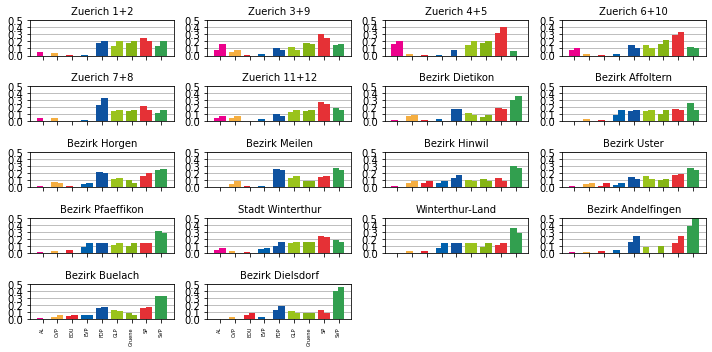

In [77]:
# read file
path = "out/data.out"
parties = np.genfromtxt(path, delimiter=";", dtype=str, max_rows=1)[:-1]
districts = np.genfromtxt(path, delimiter=";", dtype=str, skip_header=1, max_rows=1)[:-1]
votes = np.genfromtxt(path, delimiter=";", dtype=int, skip_header=2, max_rows=1)[:-1].reshape((len(districts), len(parties)))
seats = np.genfromtxt(path, delimiter=";", dtype=int, skip_header=3, max_rows=1)[:-1].reshape((len(districts), len(parties)))
seats_unrounded = np.genfromtxt(path, delimiter=";", dtype=int, skip_header=4, max_rows=1)[:-1].reshape((len(districts), len(parties)))

# row/col-wise sums
votes_districts = votes.sum(axis=1)
votes_parties = votes.sum(axis=0)
seats_districts = seats.sum(axis=1)
seats_parties = seats.sum(axis=0)
seats_unrounded_districts = seats_unrounded.sum(axis=1)
seats_unrounded_parties = seats_unrounded.sum(axis=0)

# calculate percentage per district
votes_percentage = votes.astype(float) / votes_districts[:, np.newaxis]
seats_percentage = seats.astype(float) / seats_districts[:, np.newaxis]

# plot as bar chart
plt.figure(figsize=(200, 100))
fig, axs = plt.subplots(5, 4, tight_layout=True, figsize=(10,5), sharex=True)
# delete last two subplots (only 18 districts)
fig.delaxes(axs[4, 3])
fig.delaxes(axs[4, 2])


width = 0.45
x = np.arange(len(parties))

for i in range(len(districts)):
    j = i // 4
    k = i % 4
    axs[j, k].bar(x - width/2 + 0.05, votes_percentage[i], width, color=colors.values())
    axs[j, k].bar(x + width/2 - 0.05, seats_percentage[i], width, color=colors.values())
    axs[j, k].set_title(districts[i], fontsize=10)
    axs[j, k].set_ylim(0, 0.5)
    axs[j, k].set_yticks(np.arange(0, 0.6, 0.1), )
    axs[j, k].set_xticks(x, labels=parties, rotation=90, fontsize=5)
    axs[j, k].grid(axis="y")
    axs[j, k].set_axisbelow(True)


# plt.tight_layout(pad=50)
# plt.show()
plt.subplots_adjust(wspace=1, hspace=1)
plt.savefig("out/analysis.pdf", dpi=300)